In [56]:
from sklearn.datasets import load_iris
import numpy as np

In [57]:
iris = load_iris()
X = iris.data[:, [2, 3]] #Petal Length and Petal Width
y = iris.target

In [58]:
np.unique(y)

array([0, 1, 2])

In [59]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [60]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state = 0)

In [61]:
from sklearn.preprocessing import StandardScaler #For Feature Scaling
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [62]:
x_train_std[:20]

array([[-0.18295039, -0.29145882],
       [ 0.93066067,  0.73721938],
       [ 1.04202177,  1.6373128 ],
       [ 0.6522579 ,  0.35146505],
       [ 1.09770233,  0.73721938],
       [ 0.03977182, -0.16287405],
       [ 1.26474398,  1.38014325],
       [ 0.48521625,  0.48004983],
       [-0.01590873, -0.16287405],
       [ 0.59657735,  0.73721938],
       [ 0.70793846,  0.35146505],
       [ 0.37385514,  0.6086346 ],
       [ 0.6522579 ,  0.86580415],
       [ 0.48521625,  0.22288028],
       [ 0.76361901,  0.99438893],
       [ 0.37385514,  0.48004983],
       [-1.24088089, -1.32013702],
       [ 0.70793846,  0.86580415],
       [ 0.20681348,  0.0942955 ],
       [-0.12726983,  0.0942955 ]])

 Using the fit method, StandardScaler estimated the parameters µ (sample mean) and σ (standard deviation) for each feature dimension from the training data. By calling the transform method, we then standardized the training data using those estimated parameters µ and σ . Note that we used the same scaling parameters to standardize the test set so that both the values in the training and test dataset are comparable to each other.
 
  Most algorithms in scikit-learn already support multiclass classification by default via the One-vs.-Rest (OvR) method.

In [63]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter = 40, eta0 = 0.01, random_state = 0)
ppn.fit(x_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      max_iter=None, n_iter=40, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [64]:
from sklearn.metrics import accuracy_score, f1_score
y_pred = ppn.predict(x_test_std)
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('F1 Score  = ', f1_score(y_test, y_pred, average=None))

Accuracy =  0.9111111111111111
F1 Score  =  [0.94117647 0.88235294 0.90909091]


In [65]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [265]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
#     print(cmap.colors)
    
    
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max()
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max()
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl, 0], y=X[y==cl, 1],
        alpha = 0.8, c=cmap(idx),
        marker= markers[idx], label = cl)
        
#     if test_idx:
#         X_test, y_test = X[test_idx, :], y[test_idx]
#         plt.scatter(X_test[:, 0], X_test[:, 1], c='',alpha=1.0,
#                     linewidths=1, marker='o', s=55, label='test set')

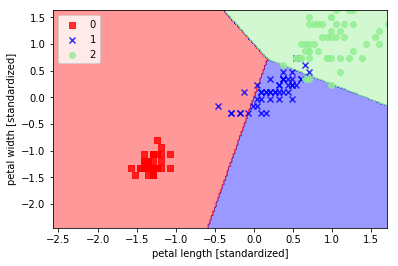

In [266]:
X_combined_std = np.vstack((x_train_std, x_test_std))
y_combined = np.hstack((y_train, y_test))
a = plot_decision_regions(X=X_combined_std, y=y_combined,classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [256]:
a[0].shape

(205, 215)

### Plotting the sigmoid function

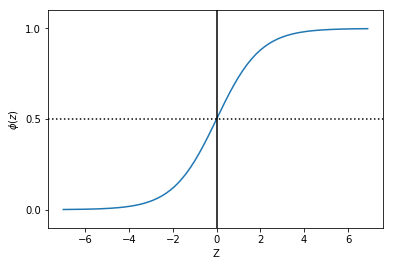

In [68]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color = 'k')
plt.axhspan(0.0, 1.0, facecolor = '1.0', alpha = 1.0, ls = 'dotted')
plt.axhline(y = 0.5, ls = 'dotted', color = 'k')
plt.yticks([0.0,0.5, 1])
plt.ylim(-0.1, 1.1)
plt.xlabel('Z')
plt.ylabel('$\phi (z)$')
plt.show()

### Training a Logistic Regression Model

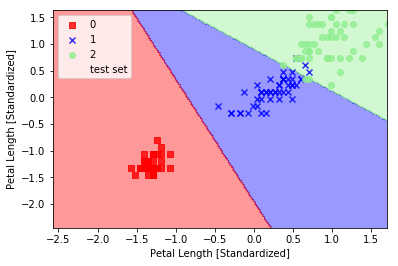

In [106]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C = 1000.0, random_state = 0)
lr.fit(x_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('Petal Length [Standardized]')
plt.ylabel('Petal Length [Standardized]')
plt.legend(loc = 'upper left')
plt.show()

In [84]:
lr.predict_proba(x_test_std[0, :].reshape(1, -1))

array([[9.97648830e-01, 2.35116378e-03, 6.19753538e-09]])

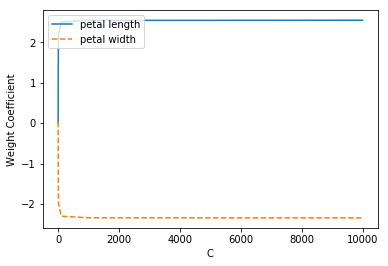

In [100]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C = 10**int(c), random_state = 0)
    lr.fit(x_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**int(c))
weights = np.array(weights)
plt.plot(params, weights [:, 0],
        label = 'petal length')
plt.plot(params, weights[:, 1], linestyle = '--',
        label = 'petal width')
plt.xlabel('C')
plt.ylabel('Weight Coefficient')
plt.legend(loc = 'upper left')


In [95]:
weights

[array([6.55979672e-05, 3.27209902e-05]),
 array([0.00065369, 0.00032495]),
 array([0.00631937, 0.00303439]),
 array([0.04881993, 0.01620922]),
 array([ 0.23882448, -0.06648319]),
 array([ 1.06011115, -0.84154482])]

### SVM

In [101]:
from sklearn.svm import SVC

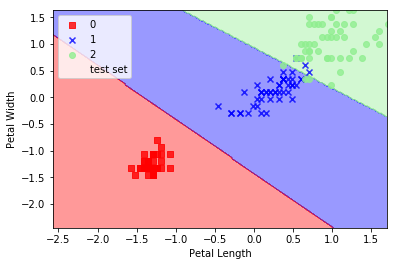

In [104]:
svm = SVC(kernel = 'linear', C = 1.0, random_state = 0)
svm.fit(x_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc = 'upper left')
plt.show()

### Non Linear Sample Dataset

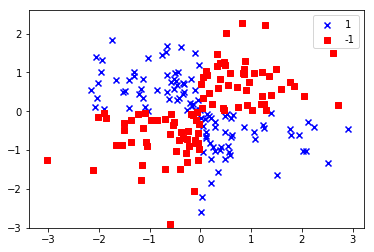

In [120]:
np.random.seed(43)

x_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(x_xor[:, 0] > 0, x_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(x_xor[y_xor == 1, 0], x_xor[y_xor == 1, 1], c= 'b',
           marker = 'x', label = '1')
plt.scatter(x_xor[y_xor == -1, 0], x_xor[y_xor ==-1, 1], c = 'r',
           marker = 's', label = '-1')
plt.ylim(-3.0)
plt.legend()
plt.show()

In [128]:
(y_xor == 1)[:20]

array([ True, False,  True, False,  True,  True, False,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True])

In [129]:
x_xor[y_xor == 1, 0][:20]

array([ 0.25739993,  0.85807335,  1.26286154, -0.34643789,  0.49291085,
        1.93513629,  0.01404054,  2.23035965, -0.10798056, -1.40787817,
       -0.13828364, -0.38665814, -2.04706913, -0.67900712, -0.65589415,
       -1.29916134, -1.48604258, -0.62648405,  0.11087648, -0.32110545])

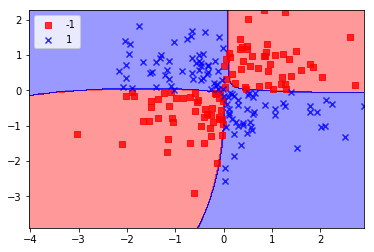

In [130]:
svm = SVC(kernel = 'rbf', random_state=0, gamma = 0.1, C = 10.0)
svm.fit(x_xor, y_xor)
plot_decision_regions(x_xor, y_xor, classifier=svm)
plt.legend(loc = 'upper left')
plt.show()

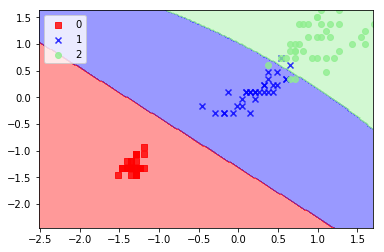

In [134]:
svm = SVC(kernel = 'rbf', random_state=0, gamma = 0.2, C = 10.0)
#Gamma can be understood as a cut-off paramter for the Gaussian sphere.If we increase the value  or reach of the training
#sample, which leads to a softer decision boundary
svm.fit(x_train_std, y_train)
plot_decision_regions(x_train_std, y_train, classifier=svm)
plt.legend(loc = 'upper left')
plt.show()

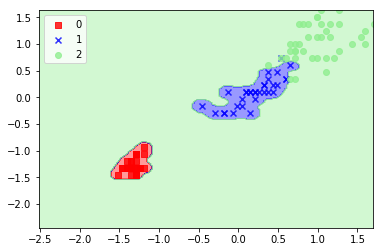

In [224]:
svm = SVC(kernel = 'rbf', random_state=0, gamma = 100, C = 10.0)#overfitting
svm.fit(x_train_std, y_train)
plot_decision_regions(x_train_std, y_train, classifier=svm)
plt.legend(loc = 'upper left')
plt.show()

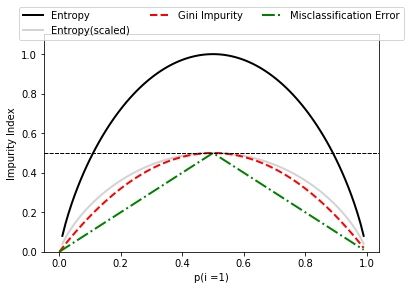

In [274]:
def gini(p):
    return ((p)*(1-p)) + ((1-p)*(1-(1-p)))

def entropy(p):
    return -(p*np.log2(p)) - ((1-p)*np.log2(1-p))

def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0, 1, 0.01)
ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], ['Entropy', 'Entropy(scaled)', 'Gini Impurity', 'Misclassification Error'],
                    ['-','-','--','-.'], ['black', 'lightgray','red', 'green', 'cyan']):
    line = ax.plot(x,i, label = lab, linestyle = ls, lw = 2, color =c)
    
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, 1.15),
         ncol = 3, fancybox = True, shadow = False)
ax.axhline(y = 0.5, linewidth = 1, color = 'k', linestyle = '--')
ax.axhline(y = 0.5, linewidth = 1, color = 'k', linestyle = '--')
plt.ylim(0, 1.1)
plt.xlabel('p(i =1)')
plt.ylabel('Impurity Index')
plt.show()

### Building a Decision Tree

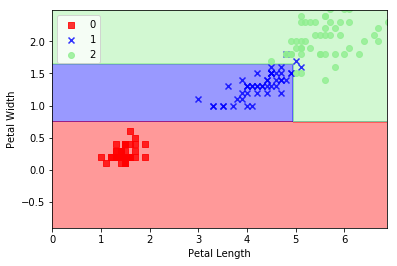

In [278]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)

tree.fit(x_train, y_train)
x_combined = np.vstack((x_train, x_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(x_combined, y_combined, classifier=tree, test_idx=range(105, 150))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc = 'upper left')
plt.show()

### Random Forests

In [282]:
from sklearn.ensemble import RandomForestClassifier

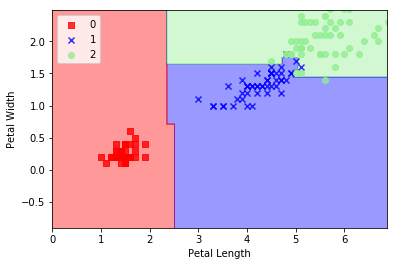

In [286]:
forest  = RandomForestClassifier(criterion= 'entropy', n_estimators=10, random_state=1, n_jobs = 2)
forest.fit(x_train, y_train)
forest.fit(x_train, y_train)
plot_decision_regions(x_combined, y_combined, classifier=forest, test_idx = range(105, 150))
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc = 'upper left')
plt.show()